In [1]:
# Perspective Transform and Polyfit

import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle

%matplotlib inline

In [2]:
# Un-pickle camera calibration
cam_cal = pickle.load(open('cam_calibration.p','rb'))
dist = cam_cal['dist']
mtx = cam_cal['mtx']

In [4]:
def warper(undist, src, dst):
    y, x = undist.shape[:2]
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, (x, y))
    return warped, M, Minv

In [5]:
image_paths = glob.glob('test_images/test*.jpg')
images = []
for path in image_paths:
    images.append(cv2.imread(path))
    
y, x = images[0].shape[:2]

In [32]:
offset = 150

src = np.float32([(575,465),
                 (750,465), 
                 (260,680), 
                 (1100,680)])
dst = np.float32([(offset,0),
                 (x-offset,0),
                 (offset,y),
                 (x-offset,y)])
# offset = 400
# dst = np.float32([
#     [offset, 0],
#     [x-offset, 0],
#     [x-offset, y], 
#     [x, y]])
# offset = 200
# src = np.float32([
#     [  588,   446 ],
#     [  691,   446 ],
#     [ 1126,   673 ],
#     [  153 ,   673 ]])
# dst = np.float32([[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])

In [33]:
undist = cv2.undistort(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB), mtx, dist, None, mtx)
warped, M, Minv = warper(undist, src, dst)

Text(0.5,1,'Warped')

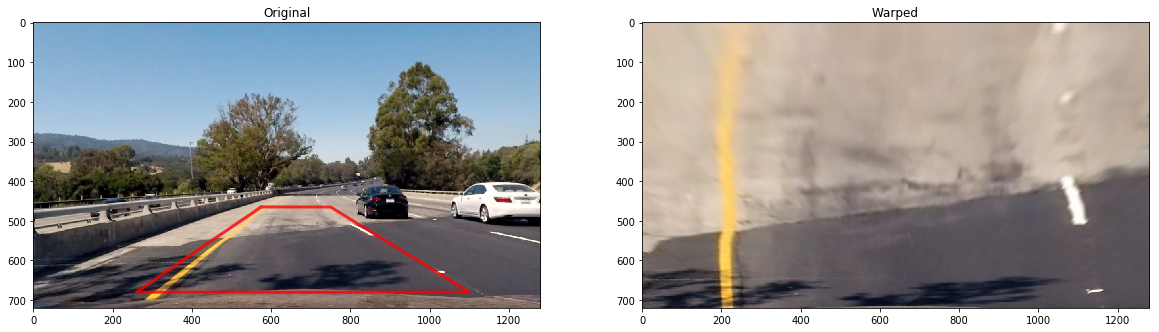

In [34]:
x_pts = [src[0][0],src[2][0],src[3][0],src[1][0],src[0][0]]
y_pts = [src[0][1],src[2][1],src[3][1],src[1][1],src[0][1]]

f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].imshow(undist)
ax[0].set_title('Original')
ax[0].plot(x_pts, y_pts, color='red', alpha=0.8, linewidth=3, solid_capstyle='round')
ax[1].imshow(warped)
ax[1].set_title('Warped')

In [35]:
# Save perspective transform in pickle
perspective_pickle = {}
perspective_pickle['M'] = M
perspective_pickle['Minv'] = Minv
pickle.dump( perspective_pickle, open( 'perspective_transform.p', 'wb' ) )